# 1.3 Core Operations

<h2>
    <ul>
        <li>Basic Operations on Images</li>
        <li>Arithmetic Operations on Images</li>
        <li>Performance Measurement and Improvement Techniques</li>
        <li>Mathematical Tools in OpenCV</li>
    </ul>
</h2>


## 1.3.1 Basic Operation on Images
<h3>
    <ul>
        <li>Access pixel values and modifiy them</li>
        <li>Access image properties</li>
        <li>Setting Region of Image (ROI)</li>
        <li>Splitting and Merging images</li>
    </ul>
</h3>

In [ ]:
import cv2
import numpy as np

img = cv2.imread ('Test.png')

px = img[100, 100]
print (px)

# accessing only blue pixel
blue = img[100, 100, 0]
print (blue)

img[100, 100] = [255, 255, 255]
print (img[100, 100])

# Better pixel accessing and editing method
# Accessing RED value
print (img.item (10, 10, 2))
# modifiy RED value
img.itemset ((10, 10, 2), 100)
print (img.item(10, 10, 2))

# Accessing Image properties
print (img.shape)
# Print number of pixels in img
print (img.size)
# Print datatype of image
print (img.dtype)

# Image ROI
copy = img [600:720, 1000:1280]
img [100:220, 200:480] = copy

# Splitting and Merging Image Channels
b,g,r = cv2.split(img)
img = cv2.merge ((b, g, r))

b = img[:,:,0]
img[:,:,2] = 0

while (1):
    cv2.imshow ('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27 :
        break
        
cv2.destroyAllWindows()

## Making Boarders for Images (Padding)

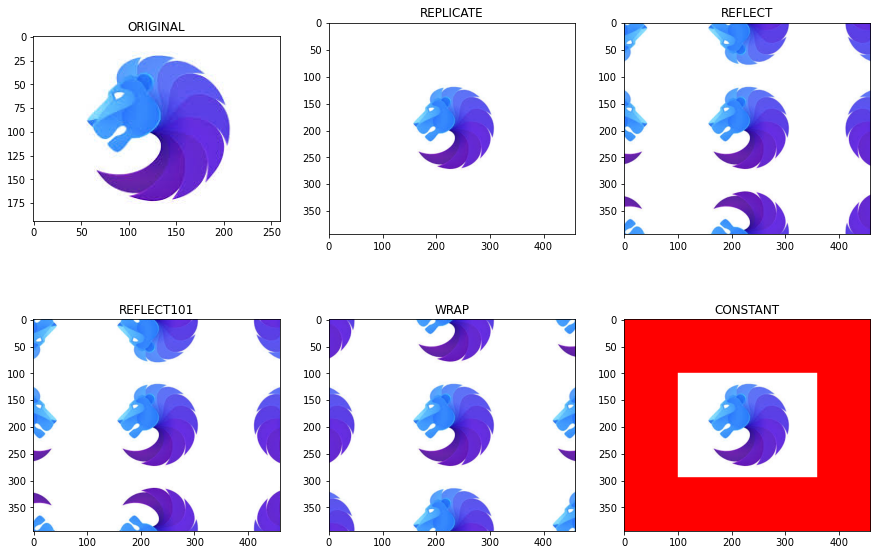

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255, 0, 0]

imgl = cv2.imread ('logo.jpg')

m = 100

plt.figure (figsize = (15, 10))

replicate = cv2.copyMakeBorder (imgl, m, m, m, m, cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder (imgl, m, m, m, m, cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder (imgl, m, m, m, m, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder (imgl, m, m, m, m, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder (imgl, m, m, m, m, cv2.BORDER_CONSTANT, value=BLUE)

plt.subplot(231), plt.imshow(imgl, 'gray'), plt.title ('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title ('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title ('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title ('REFLECT101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title ('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title ('CONSTANT')

plt.show()

## 1.3.2 Arithmetic Operations on Images
<h3>
    <ul>
        <li>Learn several arithmetic operations on images like addition, subtraction, bitwise operations etc.</li>
        <li>You will learn these functions : cv2.add(), cv2.addWeighted() etc.</li>
    </ul>
</h3>

In [2]:
import cv2
import numpy as np

#Image Addition
x = np.uint8([250])
y = np.uint8([10])

print (cv2.add (x, y)) # 250 + 10 = 260 => 255

print (x+y)            # 250 + 10 = 260 % 256 = 4


[[255]]
[4]


### Image Blending

In [14]:
import cv2

def nothing (x) :
    pass

cv2.namedWindow ('image')

img1 = cv2.imread ('img1.jpg')
img2 = cv2.imread ('img2.jpg')

alpha = cv2.createTrackbar ('alpha', 'image', 0, 1000, nothing)

while (1) :
    a = cv2.getTrackbarPos ('alpha', 'image')
    img = cv2.addWeighted (img1, 1-(a/1000), img2, a/1000, 0)
    
    cv2.imshow ('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27 :
        break
    
cv2.waitKey (0)
cv2.destroyAllWindows()



### Bitwise Operations

In [39]:
import cv2
import numpy as np

# Load two images
img1 = cv2.imread ('img2.jpg')
img2 = cv2.imread ('logo.jpg')

# I want to put logo on top-left corner, So I create a ROI
rows, cols, channels = img2.shape
roi = img1 [0:rows, 0:cols]

# Now create a mask of log and create its invers mask also
img2gray = cv2.cvtColor (img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold (img2gray, 225, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)


# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and (roi, roi, mask = mask)

# Take only region of logo from logo imgae.
img2_fg = cv2.bitwise_and (img2, img2, mask = mask_inv)

# Put logo in ROI and modify the main image
dst = cv2.add (img1_bg, img2_fg)
img1[0:rows, 0:cols] = dst

cv2.imshow ('res', img1)
cv2.waitKey (0)
cv2.destroyAllWindows()

### Performance Measurement and Improvement Techniques

In [16]:
import cv2

e1 = cv2.getTickCount()
# your code execution
e2 = cv2.getTickCount()
time = (e2 - e1) / cv2.getTickFrequency()

print (e1, e2, time)

51648274952 51648275329 3.77e-05


In [9]:
import cv2

def nothing (x) :
    pass

cv2.namedWindow ('Blur')

img1 = cv2.imread ('img2.jpg')

cv2.createTrackbar ('blur', 'Blur', 0, 255, nothing)
blur = 0

while (1) :
    
    blur = cv2.getTrackbarPos ('blur', 'Blur')
    if (blur % 2 == 0 ) :
        blur = blur + 1
    img2 = cv2.medianBlur (img1, blur)
    
    cv2.imshow ('Blur', img2)
    k = cv2.waitKey (1) & 0xFF
    if (k == 27) :
        break
        
cv2.waitKey(0)
cv2.destroyAllWindows()

### Default Optimization in OpenCV

In [9]:
import cv2

img = cv2.imread ('img1.jpg')

# check if optimization is enable
cv2.setUseOptimized (True)
print (cv2.useOptimized())    
%timeit res = cv2.medianBlur (img, 49)


cv2.setUseOptimized (False)
print (cv2.useOptimized())

%timeit res = cv2.medianBlur (img, 49)

True
71.9 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
False
78.5 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
import numpy as np

x = 5
%timeit y=x**2

%timeit y=x*x

z = np.uint8([5])

%timeit y=z*z

%timeit y=np.square(z)